In [1]:
# Tema 2    # Tema 2    # Tema 2    # Tema 2    # Tema 2    # Tema 2    # Tema 2    # Tema 2    # Tema 2    # Tema 2    # Tema 2    # Tema 2    # Tema 2

# 1. Grupează datele după zile și creează două grafice pentru datele grupate:
#   Un grafic cu suma totală a cheltuielilor publicitare în anul 2021;
#   Un grafic cu ROMI-ul zilnic în anul 2021.
# Poți compara și filtra datele chiar și fără a converti valorile câmpurilor. De exemplu, încearcă să compari valoarea "ad_date" cu textul '2022-01-01'.


# 2. Grupează datele după numele campaniei și creează două grafice:
#   Un grafic cu suma totală a cheltuielilor publicitare pentru fiecare campanie;
#   Un grafic cu ROMI-ul total pentru fiecare campanie.


# 3. Utilizând un box plot, determină distribuția ROMI-ului zilnic în fiecare campanie (după numele campaniei).


# 4. Creează o histogramă cu distribuția valorilor ROMI din tabelul facebook_ads_data.csv.


# 5. Creează un heat map a corelației între toți indicatorii numerici din tabelul facebook_ads_data.csv.
# Care indicatori au cea mai mare și cea mai mică corelație? Cu ce corelează “total_value”?

    
# 6. Creează un grafic cu puncte cu regresie liniară (poți folosi funcția lmplot()),
# pe baza datelor din “total_spend” și “total_value” pentru a vizualiza relația dintre aceste variabile.

In [3]:
import pandas as pd
facebook_ads = pd.read_csv('facebook_ads_data.csv')
facebook_ads.head()

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


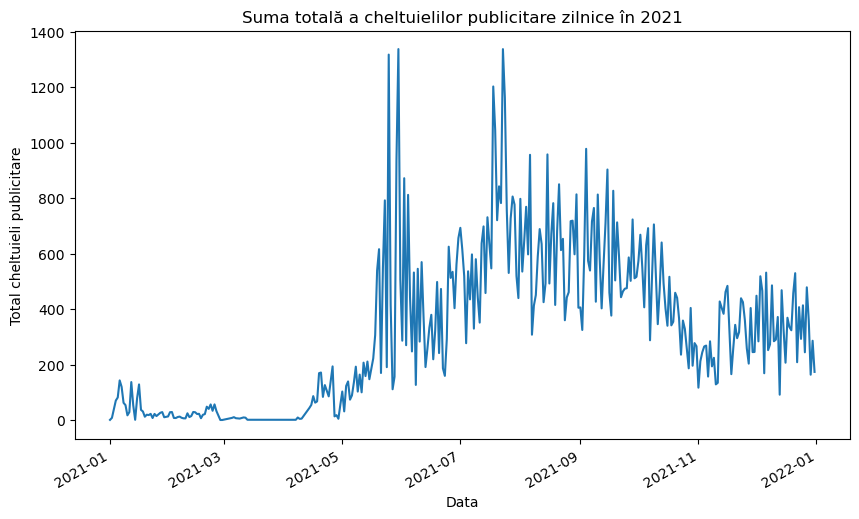

In [4]:
# 1 
# Un grafic cu suma totală a cheltuielilor publicitare în anul 2021
import matplotlib.pyplot as plt

# Filtrare date pentru anul 2021
facebook_ads['ad_date'] = pd.to_datetime(facebook_ads['ad_date'])
facebook_ads_2021 = facebook_ads[facebook_ads['ad_date'].dt.year == 2021]

# Grupare pe zile
daily_spend_2021 = facebook_ads_2021.groupby('ad_date')['total_spend'].sum()

# Graficul cu suma totală a cheltuielilor publicitare
plt.figure(figsize=(10, 6))
daily_spend_2021.plot()

plt.title('Suma totală a cheltuielilor publicitare zilnice în 2021')
plt.xlabel('Data')
plt.ylabel('Total cheltuieli publicitare')

plt.show()

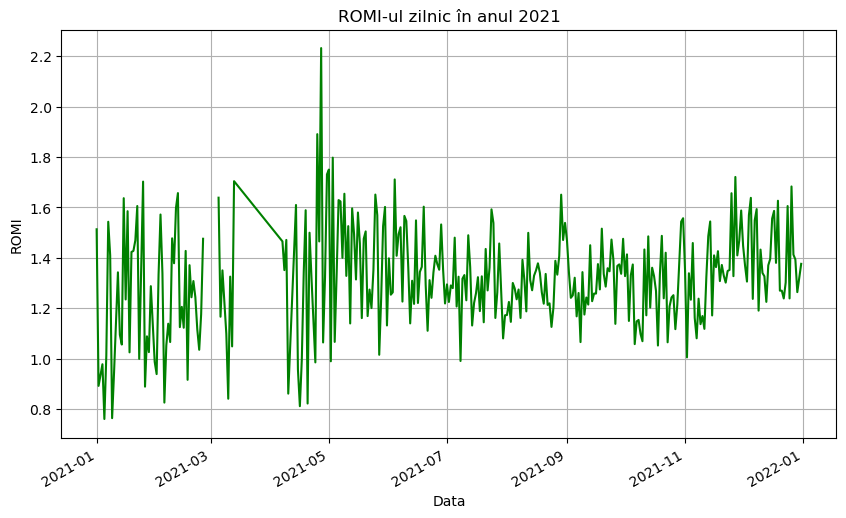

In [115]:
# 1
# Un grafic cu ROMI-ul zilnic în anul 2021

# Filtrare date pentru anul 2021
facebook_ads['ad_date'] = pd.to_datetime(facebook_ads['ad_date'])
facebook_ads_2021 = facebook_ads[facebook_ads['ad_date'].dt.year == 2021]

# Grupare pe zile
daily_romi_2021 = facebook_ads_2021.groupby('ad_date')['romi'].mean()

# Graficul cu ROMI-ul zilnic
plt.figure(figsize=(10, 6))
daily_romi_2021.plot(color = 'g')

plt.title('ROMI-ul zilnic în anul 2021')
plt.xlabel('Data')
plt.ylabel('ROMI')
plt.grid(True)

plt.show()

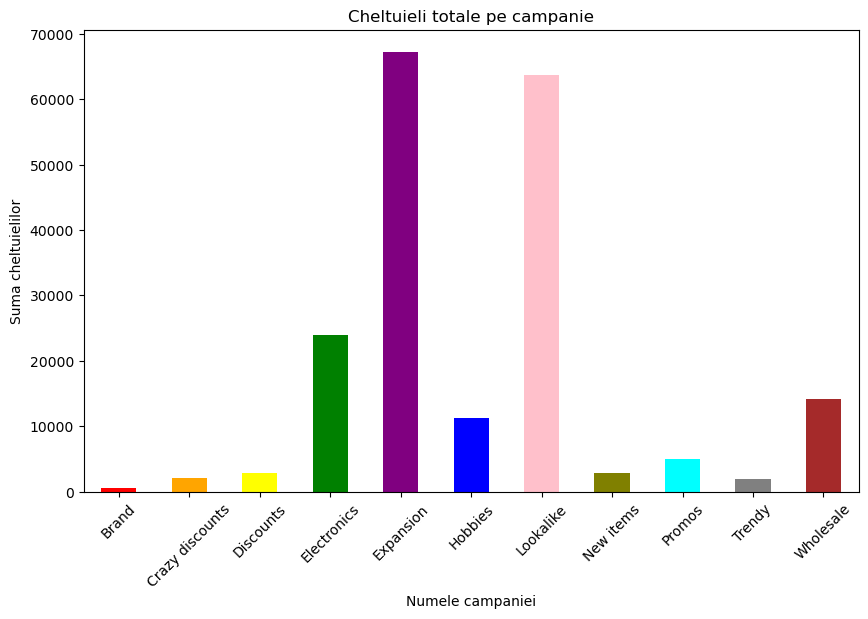

In [6]:
# 2
# Un grafic cu suma totală a cheltuielilor publicitare pentru fiecare campanie

# Grupare pe campanie
grouped_campaign = facebook_ads.groupby('campaign_name')['total_spend'].sum()

# Cream o paleta de culori pt. bar chart
colors = ['red', 'orange', 'yellow', 'green', 'purple', 'blue', 'pink', 'olive', 'cyan', 'gray', 'brown']

# Graficul cu cheltuielile totale pentru fiecare campanie
plt.figure(figsize = (10,6))
grouped_campaign.plot(kind = 'bar', color = colors)

plt.title('Cheltuieli totale pe campanie')
plt.xlabel('Numele campaniei')
plt.ylabel('Suma cheltuielilor')
plt.xticks(rotation = 45)

plt.show()

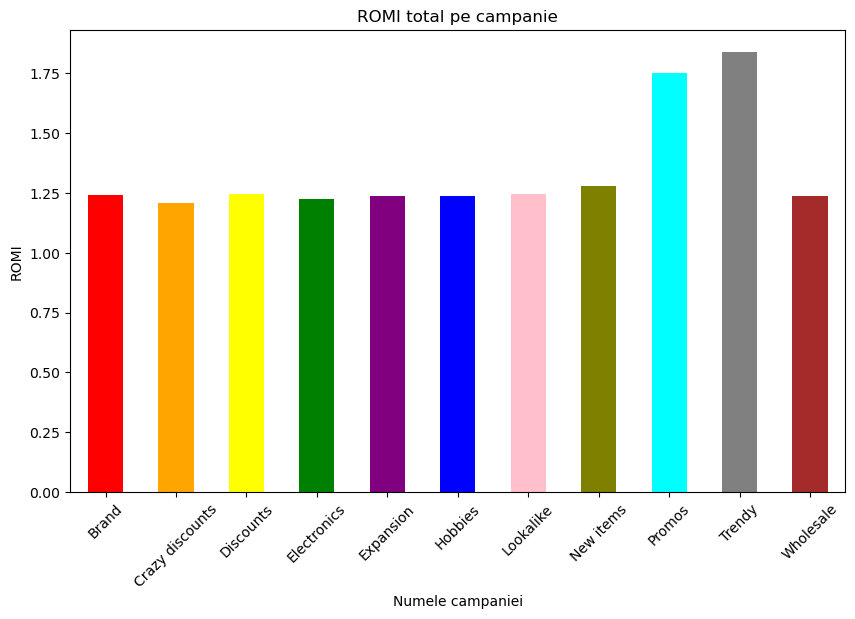

In [7]:
# 2
# Un grafic cu ROMI-ul total pentru fiecare campanie

# Grupam dupa numele campaniei si calculam ROMI-ul total
campaign_romi = facebook_ads.groupby('campaign_name')['romi'].mean()

# Graficul cu ROMI-ul totale pe campanie
plt.figure(figsize = (10,6))
campaign_romi.plot(kind = 'bar', color = colors)
plt.title('ROMI total pe campanie')
plt.xlabel('Numele campaniei')
plt.ylabel('ROMI')
plt.xticks(rotation = 45)

plt.show()

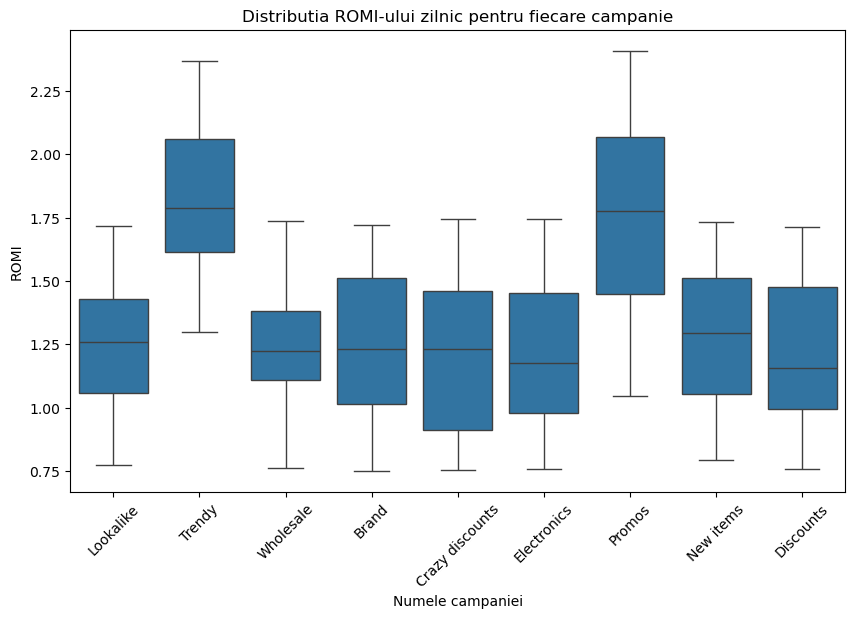

In [31]:
# 3
# Utilizând un box plot, determină distribuția ROMI-ului zilnic în fiecare campanie (după numele campaniei)

# Importam seaborn
import seaborn as sns

# Cream box plot-ul
plt.figure(figsize = (10,6))
sns.boxplot(x = 'campaign_name',
            y = 'romi',
            data = facebook_ads_2021  # l am creat mai sus la primul exercitiu
           )
plt.title('Distributia ROMI-ului zilnic pentru fiecare campanie')
plt.xlabel('Numele campaniei')
plt.ylabel('ROMI')
plt.xticks(rotation = 45)

plt.show()

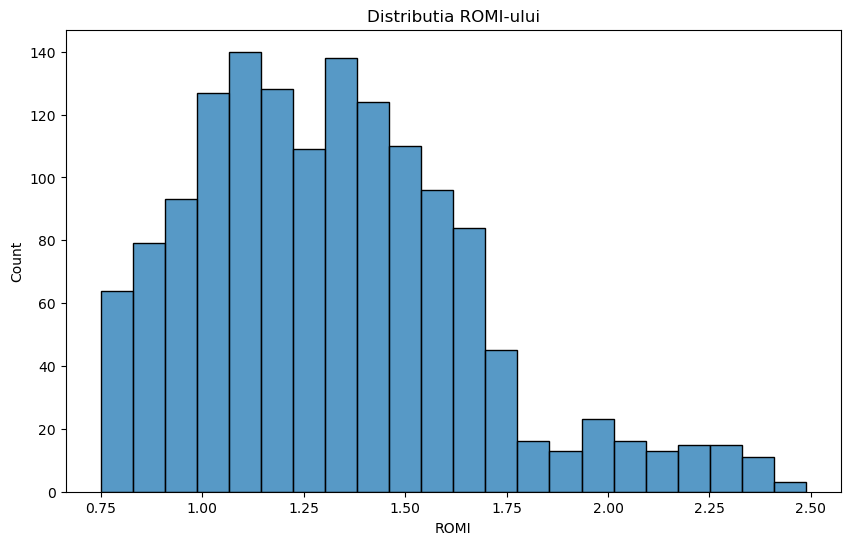

In [35]:
# 4
# Creează o histogramă cu distribuția valorilor ROMI din tabelul facebook_ads_data.csv

# Cream histograma
plt.figure(figsize = (10,6))
sns.histplot(facebook_ads, x = 'romi')
plt.title('Distributia ROMI-ului')
plt.xlabel('ROMI')

plt.show()

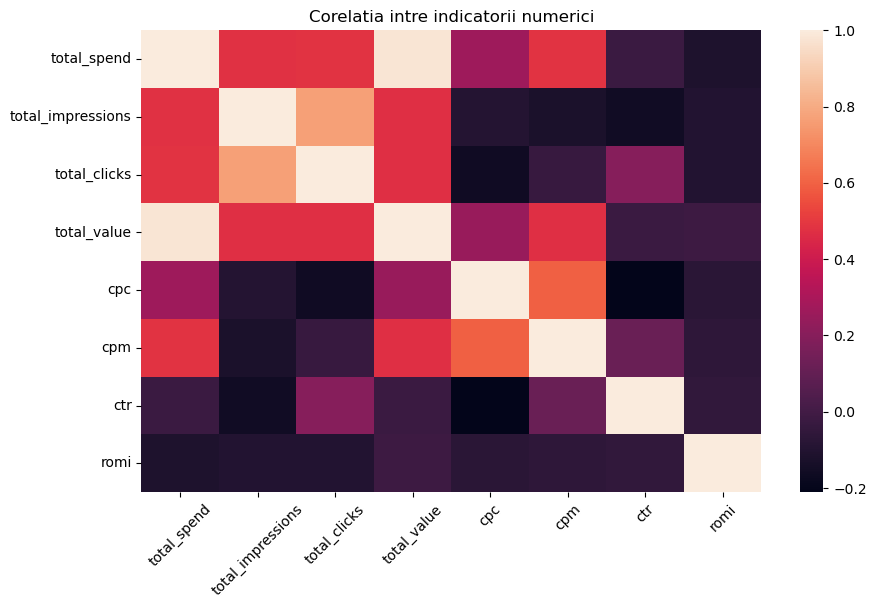

In [111]:
# 5
# Creează un heat map a corelației între toți indicatorii numerici din tabelul facebook_ads_data.csv

# df.corr()
heatmap_corr = facebook_ads.corr(numeric_only = True)

# Cream heatmap-ul
plt.figure(figsize = (10,6))
sns.heatmap(heatmap_corr)
plt.title('Corelatia intre indicatorii numerici')
plt.xticks(rotation = 45)
plt.show()

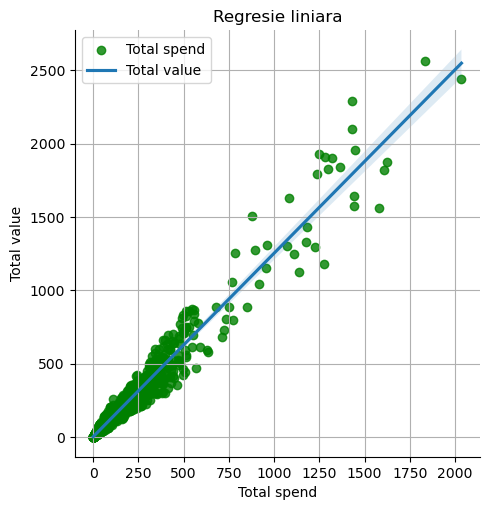

In [93]:
# 6
# Creează un grafic cu puncte cu regresie liniară (poți folosi funcția lmplot()),
# pe baza datelor din “total_spend” și “total_value” pentru a vizualiza relația dintre aceste variabile.

# Cream graficul cu functia implot()
sns.lmplot(x = 'total_spend', y = 'total_value', data = facebook_ads, scatter_kws = {'color' : 'green'})

plt.title('Regresie liniara')
plt.xlabel('Total spend')
plt.ylabel('Total value')
plt.grid(True)

plt.legend(['Total spend', 'Total value'], loc = 'upper left')
plt.show()